In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("Set2")
%matplotlib inline

Load dataset

In [2]:
df = pd.read_csv("new_db.csv", index_col="id")

`success` = учится ли человек

`fail` = отчислен ли человек

In [3]:
df["success"] = df.expulsion_sem.isnull()
df["fail"] = ~df["success"]
df

,admission_year,name,admission_condition,exam_math,exam_inf,exam_rus,individual_achievements,exam_sum,student_mark_math,student_mark_inf,expulsion_sem,gpa_after_first_sem,gpa_after_second_sem,retakes_number_after_first_sem,retakes_number_after_second_sem,success,fail
id,,,,,,,,,,,,,,,,,
0,2017,Александров Степан Андреевич,БВИ,88.0,100.0,88.0,10.0,310.0,9.0,NaN,NaN,7.17,6.53,NaN,NaN,True,False
1,2017,Батманов Игорь Артёмович,БВИ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,7.93,NaN,NaN,True,False
2,2017,Бикеев Артур Игоревич,БВИ,98.0,94.0,86.0,4.0,NaN,NaN,NaN,NaN,9.17,8.73,NaN,NaN,True,False
3,2017,Глазкин Алексей Андреевич,БВИ,84.0,84.0,72.0,6.0,NaN,9.0,8.0,NaN,7.00,7.50,NaN,NaN,True,False
4,2017,Гликин Алексей Алексеевич,БВИ,96.0,100.0,91.0,10.0,NaN,8.0,10.0,NaN,9.17,8.87,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2019,Субботин Павел Александрович,Контракт,86.0,84.0,89.0,8.0,283.0,4.0,8.0,NaN,5.14,6.35,1.0,NaN,True,False
309,2019,Дибров Андрей Алексеевич,Контракт,92.0,91.0,94.0,4.0,281.0,8.0,3.0,NaN,6.29,6.29,NaN,NaN,True,False
310,2019,Никулкин Сергей Алексеевич,Контракт,88.0,91.0,89.0,10.0,278.0,4.0,4.0,1.0,NaN,NaN,NaN,NaN,False,True


In [4]:
def draw_hist(column_name, **kwargs):
    plt.figure(figsize=(12, 8))
    if "title" in kwargs:
        plt.title(kwargs["title"])
    plt.hist(
        df.loc[df.success, column_name].dropna().to_numpy(), 
        alpha=0.5,
        label="Success",
        density=True
    )
    plt.hist(
        df.loc[df.fail, column_name].dropna().to_numpy(), 
        alpha=0.5,
        label="Fail",
        density=True
    )
    if "xlabel" in kwargs:
        plt.xlabel(kwargs["xlabel"])
    if "ylabel" in kwargs:
        plt.ylabel(kwargs["ylabel"])
    plt.legend()
    plt.show()

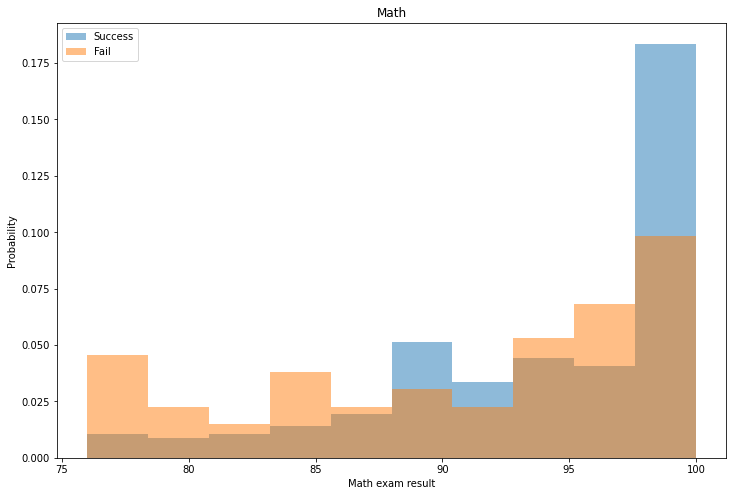

In [5]:
draw_hist("exam_math", title="Math", xlabel="Math exam result", ylabel="Probability")

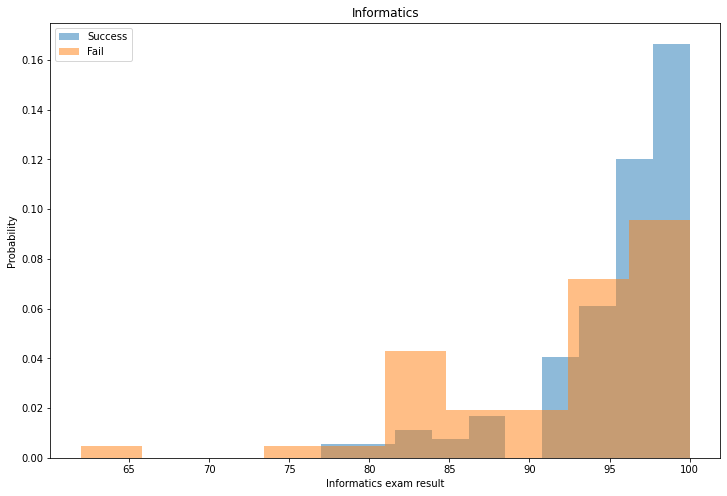

In [6]:
draw_hist("exam_inf", title="Informatics", xlabel="Informatics exam result", ylabel="Probability")

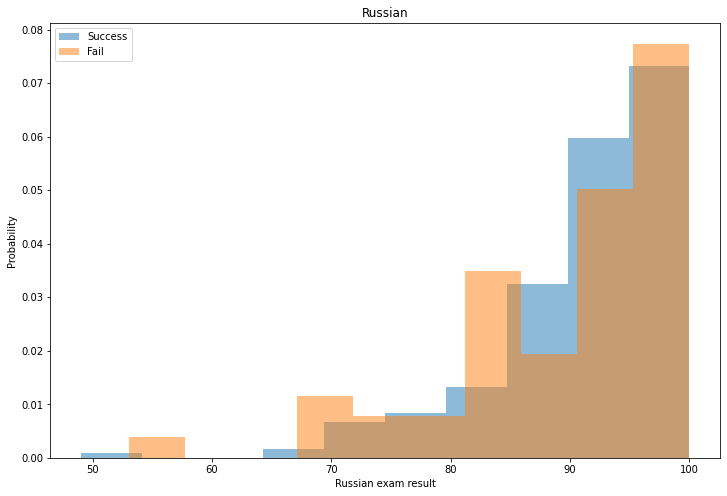

In [7]:
draw_hist("exam_rus", title="Russian", xlabel="Russian exam result", ylabel="Probability")

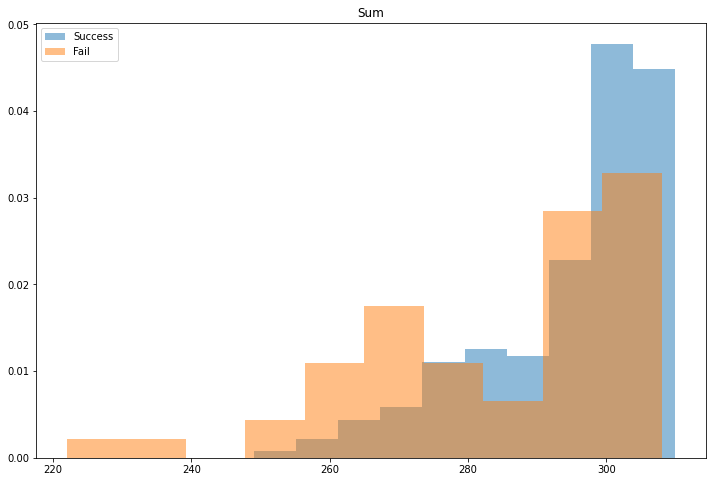

In [8]:
draw_hist("exam_sum", title="Sum")

# Models

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score

In [10]:
features = ["exam_math", "exam_inf", "exam_rus", "individual_achievements",
            "exam_sum", "student_mark_math", "student_mark_inf"]

Fill `NaN` in feature columns

In [11]:
mean_val = dict()
for feature in features:
    mean_val[feature] = df[feature].dropna().mean()
    print(f"{feature}: {df[feature].isnull().sum()} missing values")
    df.loc[df[feature].isnull(), feature] = mean_val[feature]

exam_math: 22 missing values
exam_inf: 23 missing values
exam_rus: 22 missing values
individual_achievements: 23 missing values
exam_sum: 37 missing values
student_mark_math: 113 missing values
student_mark_inf: 119 missing values


Prepare normalized data, calc mean and standard deviation among all feature columns

In [12]:
X = df[features]
y = pd.Series(~df.expulsion_sem.isnull(), dtype=np.float64)
X_norm = pd.DataFrame(data=StandardScaler().fit(X).transform(X), columns=X.columns)
print("X: mean", X.mean(axis=0), "\nX: std", X.std(axis=0), "\n\n", sep='\n')
print("X_norm: mean", X_norm.mean(axis=0), "\nX_norm: std", X_norm.std(axis=0), sep='\n')

X: mean
exam_math                   93.381443
exam_inf                    95.124138
exam_rus                    90.896907
individual_achievements      7.975862
exam_sum                   292.753623
student_mark_math            7.350000
student_mark_inf             7.139175
dtype: float64

X: std
exam_math                   6.268731
exam_inf                    5.596912
exam_rus                    7.841153
individual_achievements     3.202979
exam_sum                   13.851230
student_mark_math           1.488740
student_mark_inf            1.570197
dtype: float64



X_norm: mean
exam_math                 -2.518397e-16
exam_inf                  -2.553868e-17
exam_rus                  -1.062659e-15
individual_achievements   -1.064112e-16
exam_sum                  -8.555457e-16
student_mark_math         -2.915666e-16
student_mark_inf           3.327122e-16
dtype: float64

X_norm: std
exam_math                  1.001601
exam_inf                   1.001601
exam_rus                   1.0016

In [13]:
def run_cross_validation(clf):
    global X_norm, y
    score = cross_validate(clf, X_norm, y, scoring=[
        "accuracy",
        "f1",
        "f1_micro",
        "f1_macro",
        "f1_weighted",
        "balanced_accuracy"
    ])
    print("Mean cross validation baseline score is:")
    print(f"Accuracy: {score['test_accuracy'].mean():.4f}")
    print(f"Balanced accuracy: {score['test_balanced_accuracy'].mean():.4f}")
    print(f"f1: {score['test_f1'].mean():.4f}")
    print(f"f1_micro: {score['test_f1_micro'].mean():.4f}")
    print(f"f1_macro: {score['test_f1_macro'].mean():.4f}")
    print(f"f1_weighted: {score['test_f1_weighted'].mean():.4f}")


def pipeline(clf, params, scoring='f1_macro'):
    grid_clf = GridSearchCV(clf, params, scoring=scoring)
    grid_clf = grid_clf.fit(X_norm, y)
    run_cross_validation(grid_clf.best_estimator_)
    return grid_clf.best_estimator_

## 0. Baseline

In [14]:
from scipy.stats import bernoulli
from sklearn.base import BaseEstimator

class Baseline(BaseEstimator):
    def fit(self, X, y):
        self.p = y.mean()
        return self
    
    def predict(self, X):
        return bernoulli.rvs(self.p, size=len(X))

In [15]:
run_cross_validation(Baseline())

Mean cross validation baseline score is:
Accuracy: 0.6871
Balanced accuracy: 0.5140
f1: 0.1973
f1_micro: 0.6871
f1_macro: 0.5007
f1_weighted: 0.6987


## 1. Linear model

In [16]:
from sklearn.linear_model import LogisticRegression

Выбираем параметры перебором

`penalty`: тип регуляризации

`C`: коэффициент перед регуляризатором

`class_weight`: веса классов обратно пропорциональны их частоте (это нужно, так как отчисленных мало, классы неравноправны)

In [17]:
params = {
    'penalty': ('l2', 'l1'),
    'C': (1, 5, 10, 100, 200, 500, 1000, 2000, 5000),
    'class_weight': ('balanced', None)
}

In [18]:
clf = pipeline(
    LogisticRegression(solver="liblinear", max_iter=1000),
    params,
    scoring='f1'
)

Mean cross validation baseline score is:
Accuracy: 0.6616
Balanced accuracy: 0.6118
f1: 0.3594
f1_micro: 0.6616
f1_macro: 0.5620
f1_weighted: 0.6896


In [19]:
clf

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

## 2. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
params = {
    'criterion': ('gini', 'entropy'),
    'max_depth': (1, 5, 10, 15, 20),
    'min_samples_split': (2, 3, 4, 5),
    'class_weight': ('balanced', None)
}

In [22]:
clf = pipeline(
    DecisionTreeClassifier(splitter='best'),
    params,
    scoring='f1'
)

Mean cross validation baseline score is:
Accuracy: 0.5909
Balanced accuracy: 0.5566
f1: 0.3225
f1_micro: 0.5909
f1_macro: 0.5125
f1_weighted: 0.6318


## 3. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
params = {
    'n_estimators': (50, 100),
    'criterion': ('gini', 'entropy'),
    'max_depth': (1, 2, 5, 10, 20),
    'min_samples_split': (2, 3, 5),
    'class_weight': ('balanced', 'balanced_subsample')
}

In [25]:
clf = pipeline(RandomForestClassifier(), params, scoring='f1')

Mean cross validation baseline score is:
Accuracy: 0.6841
Balanced accuracy: 0.5850
f1: 0.3072
f1_micro: 0.6841
f1_macro: 0.5471
f1_weighted: 0.6982


In [26]:
clf

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=1, n_estimators=50)

## Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
params = {
    'loss': ('deviance', 'exponential'),
    'learning_rate': (0.1, 0.01),
    'n_estimators': (50, 100),
    'min_samples_split': (2, 3, 5),
    'max_depth': (1, 2, 3),
    'max_features': ('auto', 'sqrt', 'log2')
}

In [29]:
clf = pipeline(
    GradientBoostingClassifier(warm_start=True),
    params,
    scoring='f1'
)

Mean cross validation baseline score is:
Accuracy: 0.7955
Balanced accuracy: 0.5336
f1: 0.1581
f1_micro: 0.7955
f1_macro: 0.5206
f1_weighted: 0.7493


In [30]:
clf

GradientBoostingClassifier(loss='exponential', max_depth=2, max_features='auto',
                           warm_start=True)